In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')


In [2]:
df = df.drop(columns=['location'])
df

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57,4,4,52000
1,Яккасарайский,2,52,4,5,56000
2,Чиланзарский,2,42,4,4,37000
3,Чиланзарский,3,65,1,4,49500
4,Чиланзарский,3,70,3,5,55000
...,...,...,...,...,...,...
7560,Яшнободский,1,38,5,5,24500
7561,Яшнободский,2,49,1,4,32000
7562,Шайхантахурский,2,64,3,9,40000
7563,Мирзо-Улугбекский,1,18,1,4,11000


In [3]:
df['district'].value_counts()

Чиланзарский         1641
Мирзо-Улугбекский    1382
Юнусабадский          883
Учтепинский           880
Мирабадский           773
Яккасарайский         658
Яшнободский           484
Шайхантахурский       396
Олмазорский           269
Сергелийский          175
Янгихаётский           16
Бектемирский            8
Name: district, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   district    7565 non-null   object
 1   rooms       7565 non-null   int64 
 2   size        7565 non-null   object
 3   level       7565 non-null   int64 
 4   max_levels  7565 non-null   int64 
 5   price       7565 non-null   object
dtypes: int64(3), object(3)
memory usage: 354.7+ KB


In [5]:
indx = df[df['price']=='Договорная'].index
df = df.drop(index=indx)
df['price'] = df['price'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7466 entries, 0 to 7564
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    7466 non-null   object 
 1   rooms       7466 non-null   int64  
 2   size        7466 non-null   object 
 3   level       7466 non-null   int64  
 4   max_levels  7466 non-null   int64  
 5   price       7466 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 408.3+ KB


In [6]:
indx = df[df['size']=='Площадьземли:1сот'].index
df = df.drop(index=indx)
df['size'] = df['size'].astype(float)

In [7]:
df['price'].corr(df['size'])

0.001106324704723873

In [8]:
housing = df
housing.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0


In [9]:
X = housing['size']
X

0       57.0
1       52.0
2       42.0
3       65.0
4       70.0
        ... 
7560    38.0
7561    49.0
7562    64.0
7563    18.0
7564    30.0
Name: size, Length: 7465, dtype: float64

In [10]:
y = housing['price']
y

0       52000.0
1       56000.0
2       37000.0
3       49500.0
4       55000.0
         ...   
7560    24500.0
7561    32000.0
7562    40000.0
7563    11000.0
7564    22914.0
Name: price, Length: 7465, dtype: float64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

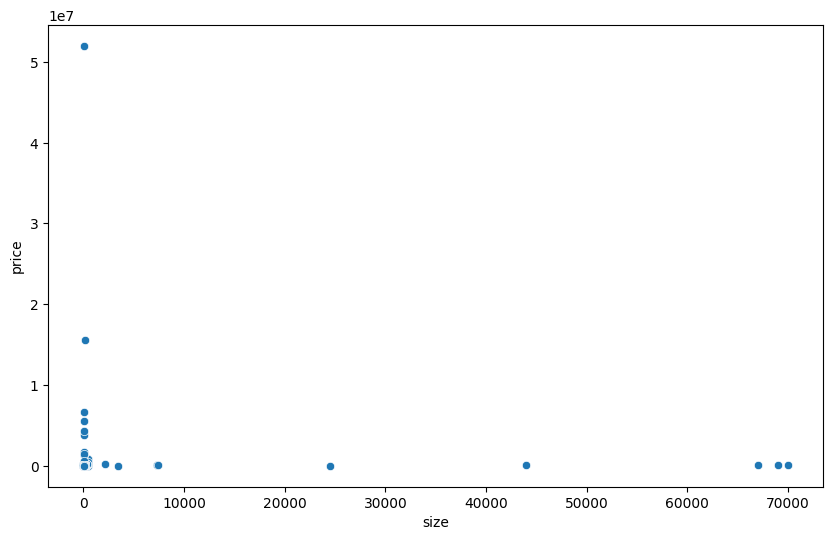

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

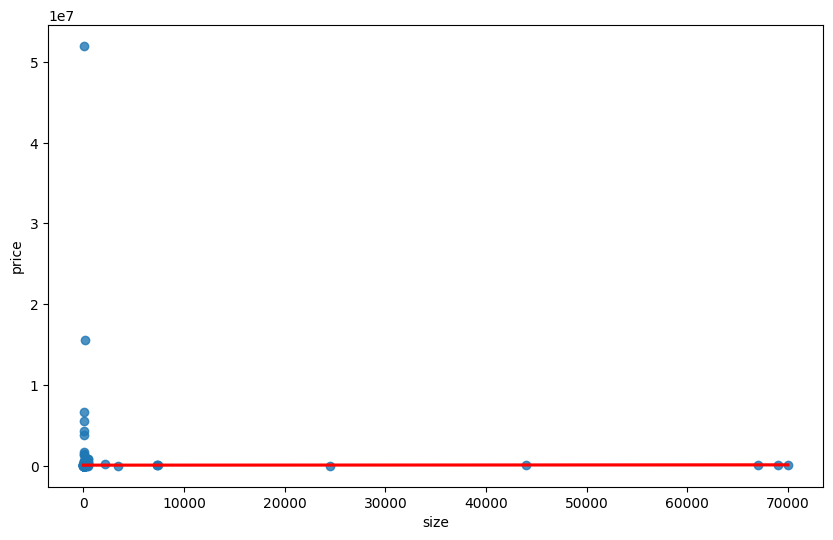

In [13]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

In [14]:
housing

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
...,...,...,...,...,...,...
7560,Яшнободский,1,38.0,5,5,24500.0
7561,Яшнободский,2,49.0,1,4,32000.0
7562,Шайхантахурский,2,64.0,3,9,40000.0
7563,Мирзо-Улугбекский,1,18.0,1,4,11000.0


In [15]:
a = housing['size'].mean()
b = housing['price'].mean()
s1,s2=0,0
for i in list(housing.index):
  s1+=(housing.at[i,'size']-a)*(housing.at[i,'price']-b)
  s2+=(housing.at[i,'size']-a)**2
tetta1 = s1/s2
tetta0 = b - tetta1*a
y = list(housing['price'])
labels = []
for i in list(housing.index):
  labels.append(tetta0+tetta1*housing.at[i,'size'])
jav = {
    'district':housing['district'],
    'rooms':housing['rooms'],
    'size':housing['size'],
    'level':housing['level'],
    'max_levels':housing['max_levels'],
    'price':y,
    'pragnoz_price':labels
}
javoblar = pd.DataFrame(jav,index=housing.index)
javoblar

,district,rooms,size,level,max_levels,price,pragnoz_price
0,Юнусабадский,3,57.0,4,4,52000.0,71296.982203
1,Яккасарайский,2,52.0,4,5,56000.0,71294.621778
2,Чиланзарский,2,42.0,4,4,37000.0,71289.900930
3,Чиланзарский,3,65.0,1,4,49500.0,71300.758881
4,Чиланзарский,3,70.0,3,5,55000.0,71303.119305
...,...,...,...,...,...,...,...
7560,Яшнободский,1,38.0,5,5,24500.0,71288.012591
7561,Яшнободский,2,49.0,1,4,32000.0,71293.205524
7562,Шайхантахурский,2,64.0,3,9,40000.0,71300.286796
7563,Мирзо-Улугбекский,1,18.0,1,4,11000.0,71278.570894


In [16]:
MAE = 0
for i in list(javoblar.index):
  MAE += np.abs(javoblar.at[i,'price']-javoblar.at[i,'pragnoz_price'])
MAE *=1/len(javoblar.index)
MAE

45697.97226739177

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
predicted_values = labels
mae = mean_absolute_error(housing['price'], predicted_values)
mae

45697.97226739185

In [18]:
RMSE = 0
for i in list(javoblar.index):
  RMSE += (javoblar.at[i,'price']-javoblar.at[i,'pragnoz_price'])**2
RMSE = np.sqrt(1/len(javoblar.index)*RMSE)
RMSE

640522.6445504755

In [19]:
rmse = np.sqrt(mean_squared_error(housing['price'], predicted_values))
rmse

640522.6445504745

In [20]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.10, random_state=42)

In [28]:
from numpy.core.multiarray import asanyarray
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])

#modelni o'qitamiz
LR_model.fit(x_train,y_train)

#theta1 va theta0 koeefisentlarni ajratib olamiz 
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print (f'{theta1=}')
print (f'{theta0=}')

theta1=0.5515083680658281
theta0=63944.727405538804


Text(0, 0.5, 'Price')

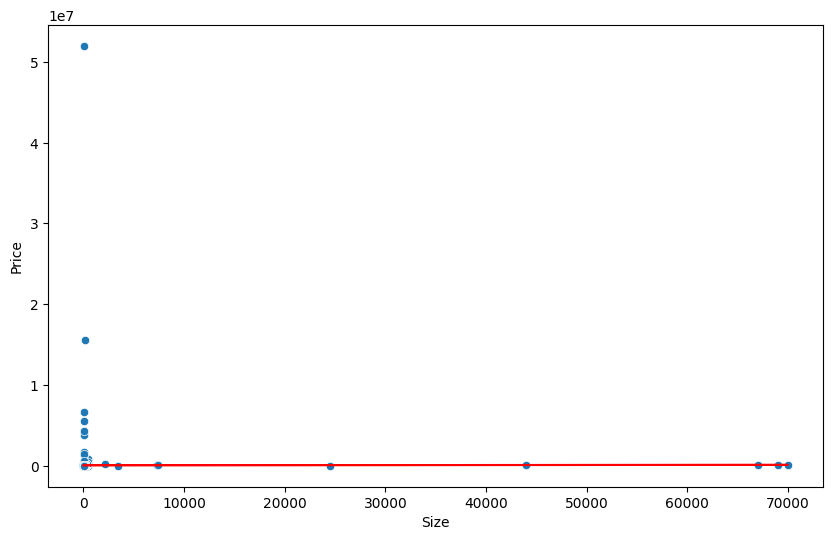

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("Size")
plt.ylabel("Price")

In [30]:
x_test = np.asanyarray(test_set[['size']])
y_test = np.asanyarray(test_set[['price']])

In [31]:
y_predict = LR_model.predict(x_test)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"{MAE=}")
print(f"{RMSE=}")

MAE=106339.25976070079
RMSE=1915799.4279797827
